In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!unzip "/content/drive/My Drive/CV Project/Sneaker Dataset.zip"

Archive:  /content/drive/My Drive/CV Project/Sneaker Dataset.zip
  inflating: Sneaker Dataset/0.png   
  inflating: Sneaker Dataset/1.png   
  inflating: Sneaker Dataset/10.png  
  inflating: Sneaker Dataset/100.png  
  inflating: Sneaker Dataset/101.png  
  inflating: Sneaker Dataset/102.png  
  inflating: Sneaker Dataset/103.png  
  inflating: Sneaker Dataset/104.png  
  inflating: Sneaker Dataset/105.png  
  inflating: Sneaker Dataset/106.png  
  inflating: Sneaker Dataset/107.png  
  inflating: Sneaker Dataset/108.png  
  inflating: Sneaker Dataset/109.png  
  inflating: Sneaker Dataset/11.png  
  inflating: Sneaker Dataset/110.png  
  inflating: Sneaker Dataset/111.png  
  inflating: Sneaker Dataset/112.png  
  inflating: Sneaker Dataset/113.png  
  inflating: Sneaker Dataset/114.png  
  inflating: Sneaker Dataset/115.png  
  inflating: Sneaker Dataset/116.png  
  inflating: Sneaker Dataset/117.png  
  inflating: Sneaker Dataset/118.png  
  inflating: Sneaker Dataset/119.png  
  i

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Dropout, Flatten, BatchNormalization, Input, Reshape, LeakyReLU, ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import img_to_array, load_img

In [16]:
def discriminator(input_shape=(128, 128, 3)):
    model = Sequential([
        Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=input_shape),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(momentum=0.5),
        LeakyReLU(alpha=0.2),

        Conv2D(256, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(momentum=0.5),
        LeakyReLU(alpha=0.2),

        Conv2D(512, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(momentum=0.5),
        LeakyReLU(alpha=0.2),

        # Output => 8 * 8 * 512
        Flatten(),
        Dense(1, activation='sigmoid')
    ])

    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=None)

    return model

In [17]:
def generator():
    model = Sequential([
        Dense(4*4*512, input_shape=(120,)),
        Reshape((4, 4, 512)),
        BatchNormalization(momentum=0.5),
        ReLU(),

        Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(momentum=0.5),
        ReLU(),

        Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(momentum=0.5),
        ReLU(),

        Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(momentum=0.5),
        ReLU(),

        Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        BatchNormalization(momentum=0.5),
        ReLU(),

        Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='tanh', use_bias=False),
    ])

    opt = Adam(learning_rate=0.00015, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=None)

    return model

In [18]:
def gan(gen_model, disc_model):
    disc_model.trainable = False

    model = Sequential([
        gen_model,
        disc_model
    ])

    opt = Adam(learning_rate=0.001, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)

    return model

In [19]:
def load_dataset(directory="/content/Sneaker Dataset", target_size=(128, 128)):
    images = []
    for filename in os.listdir(directory):
        img = load_img(os.path.join(directory, filename), target_size=target_size)
        images.append(img_to_array(img))

    dataset = np.array(images)
    dataset = dataset.astype('float32')
    dataset /= 127.5
    dataset -= 1.0

    return dataset

def generate_real_samples(dataset, num_samples):
    ix = np.random.randint(0, dataset.shape[0], num_samples)

    X = dataset[ix]
    y = np.zeros((num_samples, 1)) + 0.9  # One sided Label smoothing


    return X, y

def generate_latent_points(num_samples): # gen model input
    x_input = np.random.normal(0, 1, 120 * num_samples)
    x_input = x_input.reshape(num_samples, 120)

    return x_input

def generate_fake_samples(gen_model, num_samples): # gen model output
    x_input = generate_latent_points(num_samples)

    X = gen_model.predict(x_input)
    y = np.zeros((num_samples, 1))


    return X, y

def save_plot(examples, n):

    for i in range(n * n):
        plt.subplot(n, n, 1 + i)
        plt.axis('off')

        examples[i] += 1
        examples[i] *= 127.5
        plt.imshow(examples[i].astype(np.uint8), interpolation='nearest')

    plt.savefig("results.png")
    plt.show()

2/2 [==============================] - 1s 6ms/step
>1, 1/21, d=1.218, g=0.782
2/2 [==============================] - 0s 10ms/step
>1, 2/21, d=1.054, g=0.739
2/2 [==============================] - 0s 11ms/step
>1, 3/21, d=0.931, g=0.446
2/2 [==============================] - 0s 8ms/step
>1, 4/21, d=1.928, g=3.058
2/2 [==============================] - 0s 8ms/step
>1, 5/21, d=0.401, g=3.719
2/2 [==============================] - 0s 8ms/step
>1, 6/21, d=0.224, g=2.579
2/2 [==============================] - 0s 8ms/step
>1, 7/21, d=0.285, g=1.786
2/2 [==============================] - 0s 8ms/step
>1, 8/21, d=0.586, g=6.108
2/2 [==============================] - 0s 8ms/step
>1, 9/21, d=0.393, g=4.480
2/2 [==============================] - 0s 8ms/step
>1, 10/21, d=0.292, g=3.458
2/2 [==============================] - 0s 8ms/step
>1, 11/21, d=0.415, g=8.895
2/2 [==============================] - 0s 8ms/step
>1, 12/21, d=0.281, g=6.676
2/2 [==============================] - 0s 8ms/step
>1, 13/2

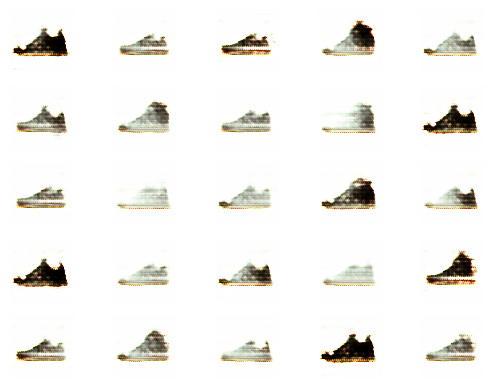

2/2 [==============================] - 0s 10ms/step
>51, 1/21, d=0.444, g=7.598
2/2 [==============================] - 0s 12ms/step
>51, 2/21, d=0.432, g=7.123
2/2 [==============================] - 0s 12ms/step
>51, 3/21, d=0.291, g=5.722
2/2 [==============================] - 0s 9ms/step
>51, 4/21, d=0.264, g=4.746
2/2 [==============================] - 0s 9ms/step
>51, 5/21, d=0.288, g=3.387
2/2 [==============================] - 0s 10ms/step
>51, 6/21, d=0.363, g=5.304
2/2 [==============================] - 0s 9ms/step
>51, 7/21, d=0.334, g=2.751
2/2 [==============================] - 0s 9ms/step
>51, 8/21, d=0.285, g=4.440
2/2 [==============================] - 0s 9ms/step
>51, 9/21, d=0.299, g=3.345
2/2 [==============================] - 0s 9ms/step
>51, 10/21, d=0.275, g=3.368
2/2 [==============================] - 0s 9ms/step
>51, 11/21, d=0.332, g=3.104
2/2 [==============================] - 0s 10ms/step
>51, 12/21, d=0.319, g=1.315
2/2 [==============================] - 0s 9m

<ipython-input-19-151804e6a95c>:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(n, n, 1 + i)


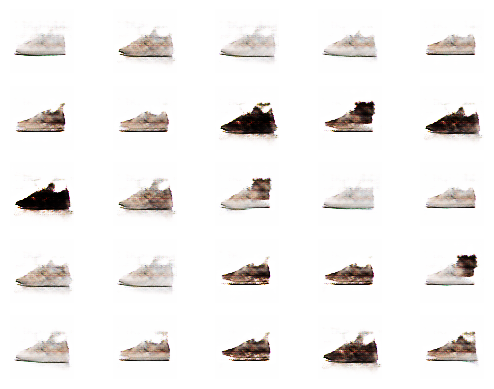

2/2 [==============================] - 0s 10ms/step
>101, 1/21, d=0.323, g=3.966
2/2 [==============================] - 0s 14ms/step
>101, 2/21, d=0.283, g=1.784
2/2 [==============================] - 0s 9ms/step
>101, 3/21, d=0.297, g=1.571
2/2 [==============================] - 0s 9ms/step
>101, 4/21, d=0.334, g=3.617
2/2 [==============================] - 0s 10ms/step
>101, 5/21, d=0.326, g=3.828
2/2 [==============================] - 0s 9ms/step
>101, 6/21, d=0.319, g=2.697
2/2 [==============================] - 0s 10ms/step
>101, 7/21, d=0.342, g=0.353
2/2 [==============================] - 0s 10ms/step
>101, 8/21, d=0.284, g=0.483
2/2 [==============================] - 0s 16ms/step
>101, 9/21, d=0.265, g=0.173
2/2 [==============================] - 0s 8ms/step
>101, 10/21, d=0.257, g=0.179
2/2 [==============================] - 0s 13ms/step
>101, 11/21, d=0.216, g=0.595
2/2 [==============================] - 0s 13ms/step
>101, 12/21, d=0.235, g=1.069
2/2 [========================

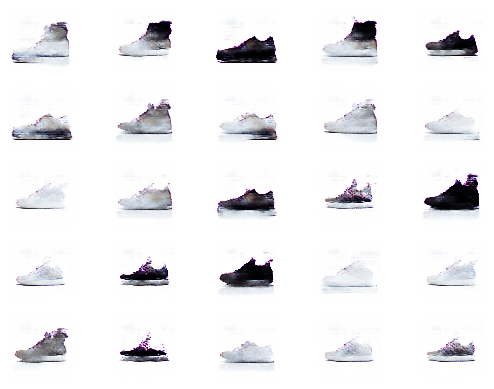

2/2 [==============================] - 0s 9ms/step
>151, 1/21, d=0.397, g=0.001
2/2 [==============================] - 0s 10ms/step
>151, 2/21, d=0.333, g=5.305
2/2 [==============================] - 0s 9ms/step
>151, 3/21, d=0.315, g=6.316
2/2 [==============================] - 0s 10ms/step
>151, 4/21, d=0.283, g=5.070
2/2 [==============================] - 0s 11ms/step
>151, 5/21, d=0.327, g=1.983
2/2 [==============================] - 0s 9ms/step
>151, 6/21, d=0.305, g=1.980
2/2 [==============================] - 0s 10ms/step
>151, 7/21, d=0.350, g=0.079
2/2 [==============================] - 0s 10ms/step
>151, 8/21, d=0.309, g=1.387
2/2 [==============================] - 0s 10ms/step
>151, 9/21, d=0.238, g=0.934
2/2 [==============================] - 0s 10ms/step
>151, 10/21, d=0.230, g=1.578
2/2 [==============================] - 0s 9ms/step
>151, 11/21, d=0.275, g=1.505
2/2 [==============================] - 0s 9ms/step
>151, 12/21, d=0.306, g=0.148
2/2 [=========================

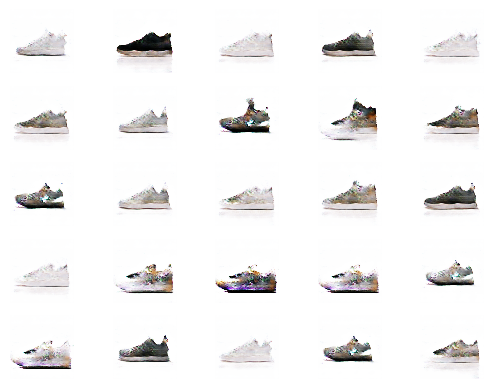

2/2 [==============================] - 0s 12ms/step
>201, 1/21, d=0.377, g=13.789
2/2 [==============================] - 0s 11ms/step
>201, 2/21, d=0.255, g=6.999
2/2 [==============================] - 0s 9ms/step
>201, 3/21, d=0.334, g=4.057
2/2 [==============================] - 0s 8ms/step
>201, 4/21, d=0.289, g=0.377
2/2 [==============================] - 0s 11ms/step
>201, 5/21, d=0.245, g=1.327
2/2 [==============================] - 0s 8ms/step
>201, 6/21, d=0.248, g=5.343
2/2 [==============================] - 0s 9ms/step
>201, 7/21, d=0.325, g=3.772
2/2 [==============================] - 0s 9ms/step
>201, 8/21, d=0.422, g=2.818
2/2 [==============================] - 0s 9ms/step
>201, 9/21, d=0.683, g=24.330
2/2 [==============================] - 0s 10ms/step
>201, 10/21, d=0.332, g=27.083
2/2 [==============================] - 0s 10ms/step
>201, 11/21, d=0.482, g=16.589
2/2 [==============================] - 0s 9ms/step
>201, 12/21, d=0.628, g=0.000
2/2 [=======================

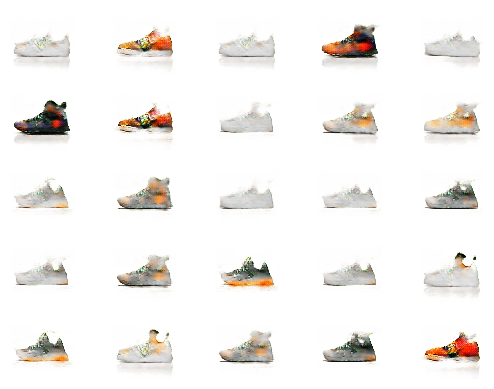

2/2 [==============================] - 0s 8ms/step
>251, 1/21, d=0.241, g=9.444
2/2 [==============================] - 0s 10ms/step
>251, 2/21, d=0.317, g=0.152
2/2 [==============================] - 0s 9ms/step
>251, 3/21, d=0.288, g=0.244
2/2 [==============================] - 0s 9ms/step
>251, 4/21, d=0.237, g=0.689
2/2 [==============================] - 0s 10ms/step
>251, 5/21, d=0.218, g=0.540
2/2 [==============================] - 0s 9ms/step
>251, 6/21, d=0.221, g=0.639
2/2 [==============================] - 0s 10ms/step
>251, 7/21, d=0.227, g=1.002
2/2 [==============================] - 0s 10ms/step
>251, 8/21, d=0.222, g=2.748
2/2 [==============================] - 0s 8ms/step
>251, 9/21, d=0.247, g=3.232
2/2 [==============================] - 0s 11ms/step
>251, 10/21, d=0.310, g=1.928
2/2 [==============================] - 0s 11ms/step
>251, 11/21, d=0.255, g=11.811
2/2 [==============================] - 0s 11ms/step
>251, 12/21, d=0.281, g=18.679
2/2 [=======================

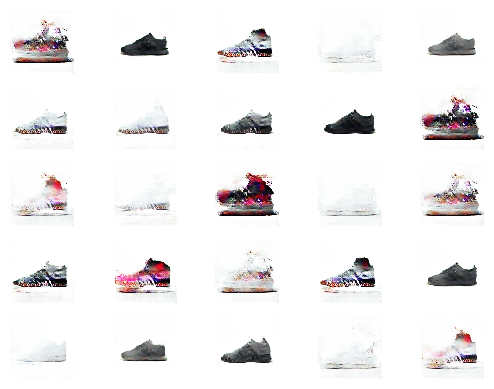

2/2 [==============================] - 0s 9ms/step
>301, 1/21, d=0.259, g=9.902
2/2 [==============================] - 0s 10ms/step
>301, 2/21, d=0.206, g=9.205
2/2 [==============================] - 0s 9ms/step
>301, 3/21, d=0.232, g=9.347
2/2 [==============================] - 0s 10ms/step
>301, 4/21, d=0.247, g=12.439
2/2 [==============================] - 0s 10ms/step
>301, 5/21, d=0.287, g=1.254
2/2 [==============================] - 0s 9ms/step
>301, 6/21, d=0.224, g=1.518
2/2 [==============================] - 0s 9ms/step
>301, 7/21, d=0.283, g=8.583
2/2 [==============================] - 0s 8ms/step
>301, 8/21, d=0.247, g=7.900
2/2 [==============================] - 0s 21ms/step
>301, 9/21, d=0.244, g=5.857
2/2 [==============================] - 0s 16ms/step
>301, 10/21, d=0.311, g=2.070
2/2 [==============================] - 0s 10ms/step
>301, 11/21, d=0.289, g=9.231
2/2 [==============================] - 0s 9ms/step
>301, 12/21, d=0.220, g=17.371
2/2 [========================

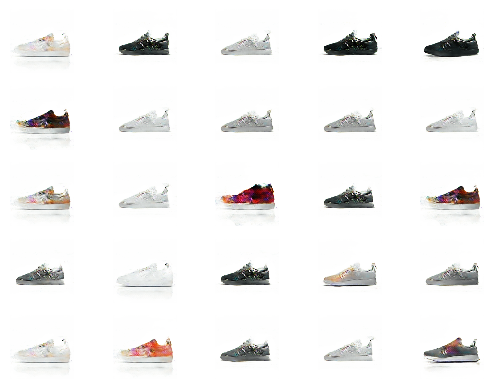

2/2 [==============================] - 0s 10ms/step
>351, 1/21, d=0.203, g=3.920
2/2 [==============================] - 0s 10ms/step
>351, 2/21, d=0.190, g=8.608
2/2 [==============================] - 0s 9ms/step
>351, 3/21, d=0.239, g=10.301
2/2 [==============================] - 0s 9ms/step
>351, 4/21, d=0.265, g=7.300
2/2 [==============================] - 0s 9ms/step
>351, 5/21, d=0.327, g=0.693
2/2 [==============================] - 0s 9ms/step
>351, 6/21, d=0.260, g=0.681
2/2 [==============================] - 0s 14ms/step
>351, 7/21, d=0.243, g=1.099
2/2 [==============================] - 0s 12ms/step
>351, 8/21, d=0.206, g=2.812
2/2 [==============================] - 0s 13ms/step
>351, 9/21, d=0.204, g=6.800
2/2 [==============================] - 0s 9ms/step
>351, 10/21, d=0.243, g=1.833
2/2 [==============================] - 0s 10ms/step
>351, 11/21, d=0.232, g=9.738
2/2 [==============================] - 0s 10ms/step
>351, 12/21, d=0.246, g=12.600
2/2 [=======================

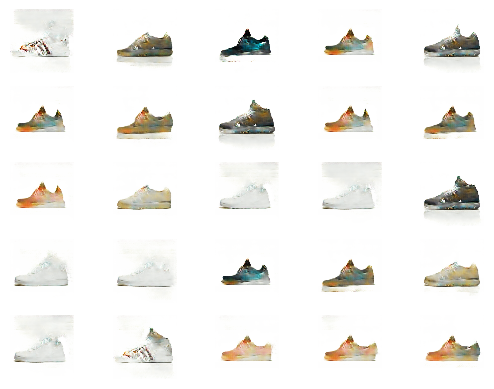

2/2 [==============================] - 0s 9ms/step
>401, 1/21, d=0.252, g=0.949
2/2 [==============================] - 0s 9ms/step
>401, 2/21, d=0.202, g=1.201
2/2 [==============================] - 0s 10ms/step
>401, 3/21, d=0.201, g=2.463
2/2 [==============================] - 0s 10ms/step
>401, 4/21, d=0.218, g=9.535
2/2 [==============================] - 0s 8ms/step
>401, 5/21, d=0.203, g=8.645
2/2 [==============================] - 0s 14ms/step
>401, 6/21, d=0.248, g=5.958
2/2 [==============================] - 0s 9ms/step
>401, 7/21, d=0.233, g=8.045
2/2 [==============================] - 0s 9ms/step
>401, 8/21, d=0.218, g=13.936
2/2 [==============================] - 0s 10ms/step
>401, 9/21, d=0.213, g=10.943
2/2 [==============================] - 0s 9ms/step
>401, 10/21, d=0.192, g=5.067
2/2 [==============================] - 0s 10ms/step
>401, 11/21, d=0.223, g=1.921
2/2 [==============================] - 0s 10ms/step
>401, 12/21, d=0.224, g=2.042
2/2 [========================

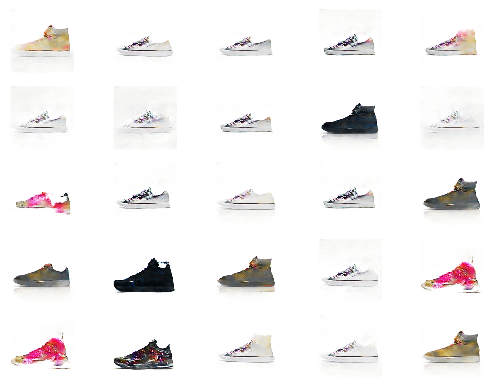

2/2 [==============================] - 0s 10ms/step
>451, 1/21, d=0.220, g=3.014
2/2 [==============================] - 0s 10ms/step
>451, 2/21, d=0.207, g=2.271
2/2 [==============================] - 0s 10ms/step
>451, 3/21, d=0.222, g=4.274
2/2 [==============================] - 0s 10ms/step
>451, 4/21, d=0.209, g=2.507
2/2 [==============================] - 0s 9ms/step
>451, 5/21, d=0.205, g=1.433
2/2 [==============================] - 0s 9ms/step
>451, 6/21, d=0.220, g=5.716
2/2 [==============================] - 0s 9ms/step
>451, 7/21, d=0.214, g=9.545
2/2 [==============================] - 0s 19ms/step
>451, 8/21, d=0.235, g=3.601
2/2 [==============================] - 0s 9ms/step
>451, 9/21, d=0.234, g=5.854
2/2 [==============================] - 0s 9ms/step
>451, 10/21, d=0.241, g=7.908
2/2 [==============================] - 0s 9ms/step
>451, 11/21, d=0.256, g=0.924
2/2 [==============================] - 0s 9ms/step
>451, 12/21, d=0.202, g=2.387
2/2 [===========================

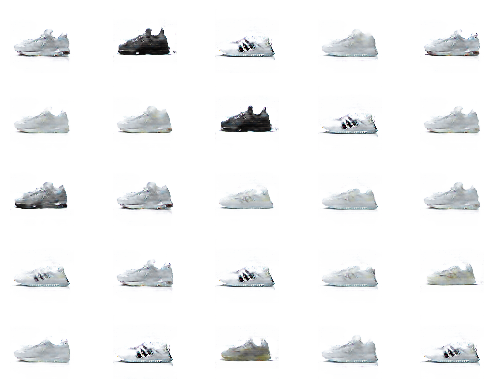

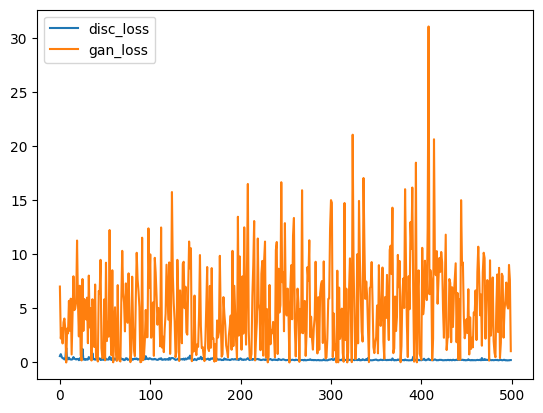

In [20]:
def train(gen_model, disc_model, gan_model, dataset, epochs=500, batch_size=64):
    num_batches_per_epoch = int(dataset.shape[0] / batch_size)
    d_loss_hist = []
    gan_loss_hist = []
    for i in range(epochs):
        for j in range(num_batches_per_epoch):
            X_real, y_real = generate_real_samples(dataset, batch_size // 2)
            X_fake, y_fake = generate_fake_samples(gen_model, batch_size // 2)

            disc_model.trainable = True
            X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
            d_loss = disc_model.train_on_batch(X, y)
            disc_model.trainable = False

            X_gan = generate_latent_points(batch_size)
            y_gan = np.ones((batch_size, 1))
            gan_loss = gan_model.train_on_batch(X_gan, y_gan)

            print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, num_batches_per_epoch, d_loss, gan_loss))

        d_loss_hist.append(d_loss)
        gan_loss_hist.append(gan_loss)
        if (i+1) % 50 == 0:
            filename = 'generator_model_%03d.keras' % (i + 1)
            gen_model.save(filename)

            latent_points = generate_latent_points(25)
            y = gen_model.predict(latent_points)
            save_plot(y, 5)

            plt.plot(d_loss_hist, label='disc_loss')
            plt.plot(gan_loss_hist, label='gan_loss')
            plt.legend()
            plt.savefig("Loss Plot.png")

disc_model = discriminator()
gen_model = generator()
gan_model = gan(gen_model, disc_model)
dataset = load_dataset()

train(gen_model, disc_model, gan_model, dataset)

In [21]:
!mkdir -p "/content/drive/My Drive/CV Project/2nd train"

!mv "/content/generator_model_300.keras" "/content/drive/My Drive/CV Project/2nd train/generator_model_300.keras"
!mv "/content/generator_model_450.keras" "/content/drive/My Drive/CV Project/2nd train/generator_model_450.keras"
!mv "/content/generator_model_500.keras" "/content/drive/My Drive/CV Project/2nd train/generator_model_500.keras"

!mv "/content/results.png" "/content/drive/My Drive/CV Project/2nd train/results.png"
!mv "/content/Loss Plot.png" "/content/drive/My Drive/CV Project/2nd train/Loss Plot.png"